In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append("../")
from simulators.extended_particle_model import generate_mixture_model

In [4]:
sigfrac_truth = 0.2
sig_mean_truth, sig_sigma_truth = 1.0, 0.1
bkg_mean_truth, bkg_sigma_truth = 0.0, 1.0
sig_mean_prior_mu, sig_mean_prior_sigma = 1.0, 2.0
num_evts = 100

xmin_plot = -2
xmax_plot = 4

In [5]:
def gauss(x, mu, sigma):
    return 1.0 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-0.5 * np.square((x - mu) / sigma))

def p_x(x, sig_strength, theta):
    return sig_strength * gauss(x, theta, sig_sigma_truth) + (1 - sig_strength) * gauss(x, bkg_mean_truth, bkg_sigma_truth)

In [6]:
def make_datasets_x(dset_length, sigfrac, theta):
    data = generate_mixture_model(dset_length, sigfrac = sigfrac, sigdist = (theta, sig_sigma_truth), 
                                  bkgdist = (bkg_mean_truth, bkg_sigma_truth))
    return data

In [7]:
xvals = np.linspace(xmin_plot, xmax_plot, 1000)

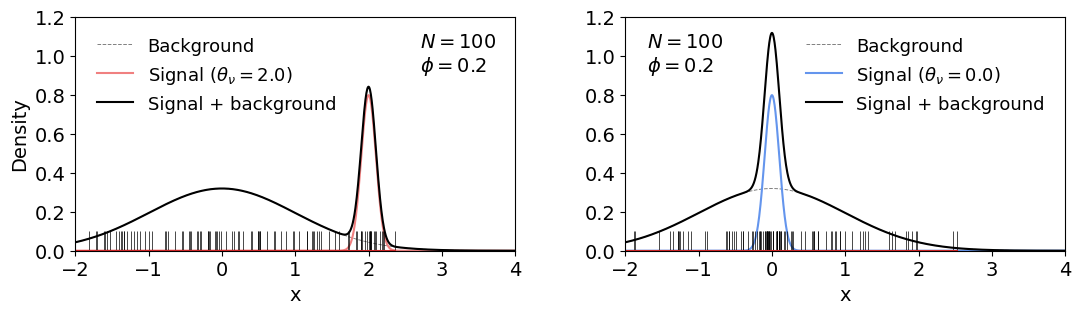

In [192]:
sigfracs = [0.2, 0.2]
thetas = [2.0, 0.0]
colors = ["lightcoral", "cornflowerblue"]

num_panes = len(sigfracs)
fig, axes = plt.subplots(nrows = 1, ncols = len(sigfracs), figsize = (11, 3))

leglocs = [(0.63, 0.52), (0.99, 0.52)]
label_locs = [(2.7, 0.92), (-1.7, 0.92)]

for ind, (ax, sigfrac, theta, color, legloc, label_loc) in enumerate(zip(axes, sigfracs, thetas, colors, leglocs, label_locs)):
    ax.plot(xvals, p_x(xvals, 0, theta) * (1 - sigfrac), ls = "dashed", color = "gray", lw = 0.7, label = "Background")
    ax.plot(xvals, p_x(xvals, 1, theta) * sigfrac, color = color, label = rf"Signal ($\theta_{{\nu}} = {theta}$)")
    ax.plot(xvals, p_x(xvals, sigfrac, theta), color = "black", label = "Signal + background")

    example_dataset = make_datasets_x(num_evts, sigfrac, theta)
    markerline, stemlines, baseline = ax.stem(example_dataset, np.full_like(example_dataset, 0.1), markerfmt = "None", linefmt = "black")
    plt.setp(stemlines, "linewidth", 0.5)
    ax.set_xlim(xmin_plot, xmax_plot)
    ax.set_ylim(0.0, 1.2)

    ax.set_xlabel("x", fontsize = 14)

    leg = ax.legend(frameon = False, ncol = 1, prop = {'size': 13}, bbox_to_anchor = legloc, loc = "lower right")
    ax.text(*label_loc, "\n".join(["$N = 100$", r"$\phi = 0.2$"]), fontsize = 14)

    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

axes[0].set_ylabel("Density", fontsize = 14)
plt.subplots_adjust(left = 0.08, right = 0.98, bottom = 0.18, top = 0.96, wspace = 0.25)

In [193]:
fig.savefig("bump_hunt_illustration.pdf")

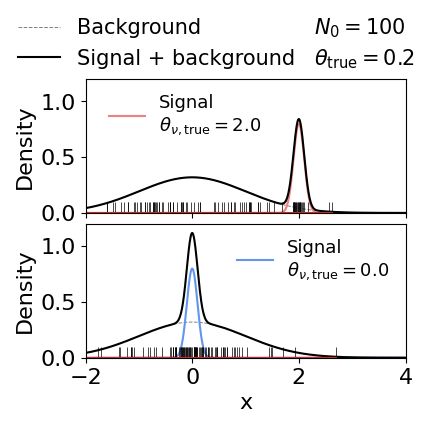

In [368]:
# small (combined) version of plot
sigfracs = [0.2, 0.2]
thetas = [2.0, 0.0]
colors = ["lightcoral", "cornflowerblue"]

num_panes = len(sigfracs)
fig, axes = plt.subplots(nrows = len(sigfracs), ncols = 1, figsize = (4, 4.1))

leglocs = [(0.6, 0.45), (1.0, 0.45)]
label_locs = [(2.7, 0.92), (-1.7, 0.92)]

for ind, (ax, sigfrac, theta, color, legloc, label_loc) in enumerate(zip(axes, sigfracs, thetas, colors, leglocs, label_locs)):
    bkg_plot = ax.plot(xvals, p_x(xvals, 0, theta) * (1 - sigfrac), ls = "dashed", color = "gray", lw = 0.7, label = "Background")
    sig_plot = ax.plot(xvals, p_x(xvals, 1, theta) * sigfrac, color = color, label = "\n".join(["Signal", rf"$\theta_{{\nu, \mathrm{{true}}}} = {theta}$"]))
    sig_bkg_plot = ax.plot(xvals, p_x(xvals, sigfrac, theta), color = "black", label = "Signal + background")

    example_dataset = make_datasets_x(num_evts, sigfrac, theta)
    markerline, stemlines, baseline = ax.stem(example_dataset, np.full_like(example_dataset, 0.1), markerfmt = "None", linefmt = "black")
    plt.setp(stemlines, "linewidth", 0.5)
    ax.set_xlim(xmin_plot, xmax_plot)
    ax.set_ylim(0.0, 1.2)

    leg = ax.legend(handles = [sig_plot[0]], frameon = False, ncol = 1, prop = {'size': 13}, bbox_to_anchor = legloc, loc = "lower right")
    ax.text(*label_loc, "\n".join([]), fontsize = 16)
    ax.set_ylabel("Density", fontsize = 16)

    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

globleg = fig.legend(handles = [bkg_plot[0], sig_bkg_plot[0]], bbox_to_anchor = (0.75, 0.81), loc = "lower right", frameon = False,  prop = {'size': 15}, ncols = 1)
fig.text(0.75, 0.94, r"$N_0 = 100$", fontsize = 15)
fig.text(0.75, 0.865, r"$\theta_{\mathrm{true}} = 0.2$", fontsize = 15)
axes[-1].set_xlabel("x", fontsize = 16)
axes[0].set_xticklabels([])
plt.subplots_adjust(left = 0.18, right = 0.98, bottom = 0.15, top = 0.83, wspace = 0.25, hspace = 0.08)

In [369]:
fig.savefig("bump_hunt_illustration_compact.pdf")